In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [144]:
# Load the dfset
file_path = 'filtered_global_education_world_happiness_average.csv'
df = pd.read_csv(file_path)




Pearson correlation between Average Completion Rate and Happiness: r = 0.53, p-value = 1.95e-07


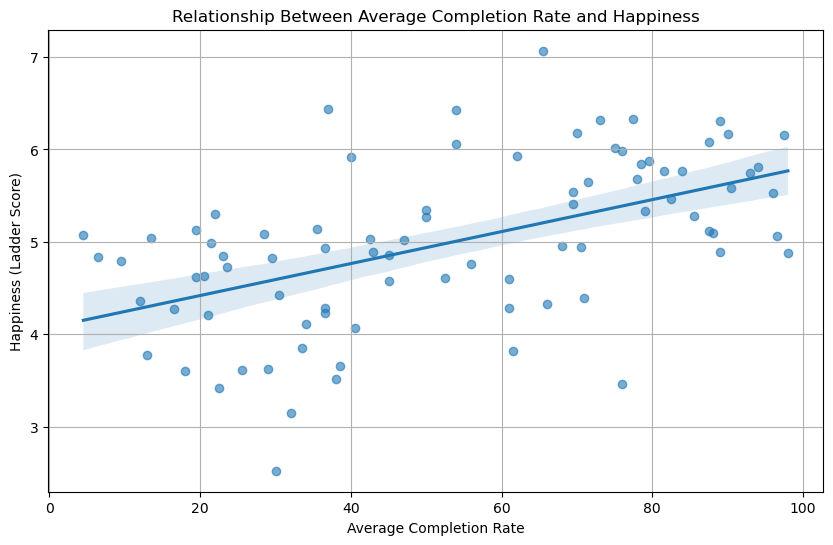

In [145]:
# Calculate the Average Completion Rate
df['Average_Completion_Rate'] = df[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']].mean(axis=1)

# Filter out entries with 0 values in the Average Completion Rate
filtered_data = df[df['Average_Completion_Rate'] != 0]

# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_data, x='Average_Completion_Rate', y='Ladder score', scatter_kws={'alpha': 0.6})
plt.title('Relationship Between Average Completion Rate and Happiness')
plt.xlabel('Average Completion Rate')
plt.ylabel('Happiness (Ladder Score)')
plt.grid(True)

# Calculate Pearson correlation coefficient and p-value
r, p_value = pearsonr(filtered_data['Average_Completion_Rate'], filtered_data['Ladder score'])
print(f'Pearson correlation between Average Completion Rate and Happiness: r = {r:.2f}, p-value = {p_value:.2e}')

plt.show()


C:\Users\stanp\AppData\Local\Temp\ipykernel_5548\861810119.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



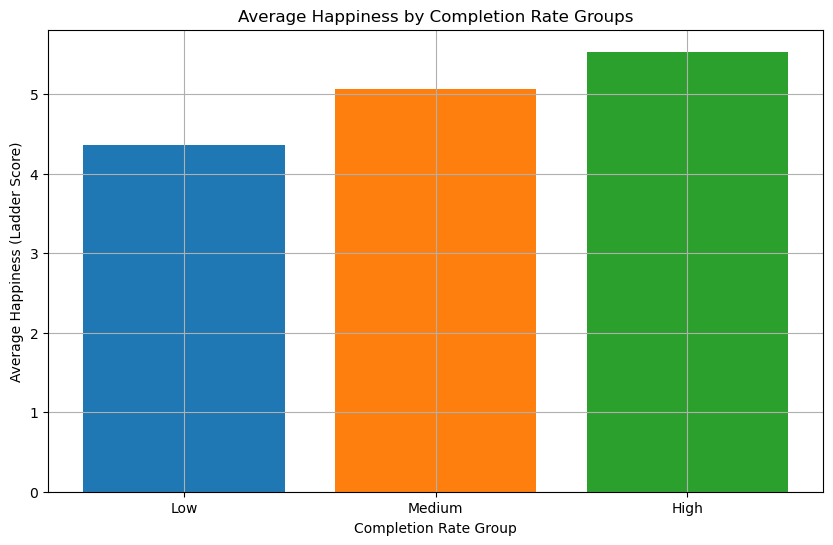

    Group  countries  avg_completion_rate  avg_happiness
0     Low         28            22.535714       4.366786
1  Medium         28            52.142857       5.061179
2    High         29            83.982759       5.536379
Bins: IntervalIndex([(-1, 27], (27, 55], (55, 84]], dtype='interval[int64, right]')
Group Size: 28


C:\Users\stanp\AppData\Local\Temp\ipykernel_5548\861810119.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [146]:
# Split data into three evenly sized groups by increasing average completion rates
filtered_data = filtered_data.sort_values('Average_Completion_Rate').reset_index(drop=True)
group_size = len(filtered_data) // 3
groups = ['Low', 'Medium', 'High']
filtered_data['Group'] = pd.cut(filtered_data.index, bins=[-1, group_size - 1, 2 * group_size - 1, len(filtered_data) - 1], labels=groups)

# Calculate the average happiness for each group
grouped_data = filtered_data.groupby('Group')['Ladder score'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Group'], grouped_data['Ladder score'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average Happiness by Completion Rate Groups')
plt.xlabel('Completion Rate Group')
plt.ylabel('Average Happiness (Ladder Score)')
plt.grid(True)
plt.show()

# Calculate the group information
group_info = filtered_data.groupby('Group').agg(
    countries=('Country', 'count'),
    avg_completion_rate=('Average_Completion_Rate', 'mean'),
    avg_happiness=('Ladder score', 'mean')
).reset_index()

# Calculate the bin edges for each group
bins = pd.cut(filtered_data.index, bins=[-1, group_size - 1, 2 * group_size - 1, len(filtered_data) - 1])

# Display the group information
print(group_info)
print(f"Bins: {bins.categories}")
print(f"Group Size: {group_size}")

c:\Users\stanp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



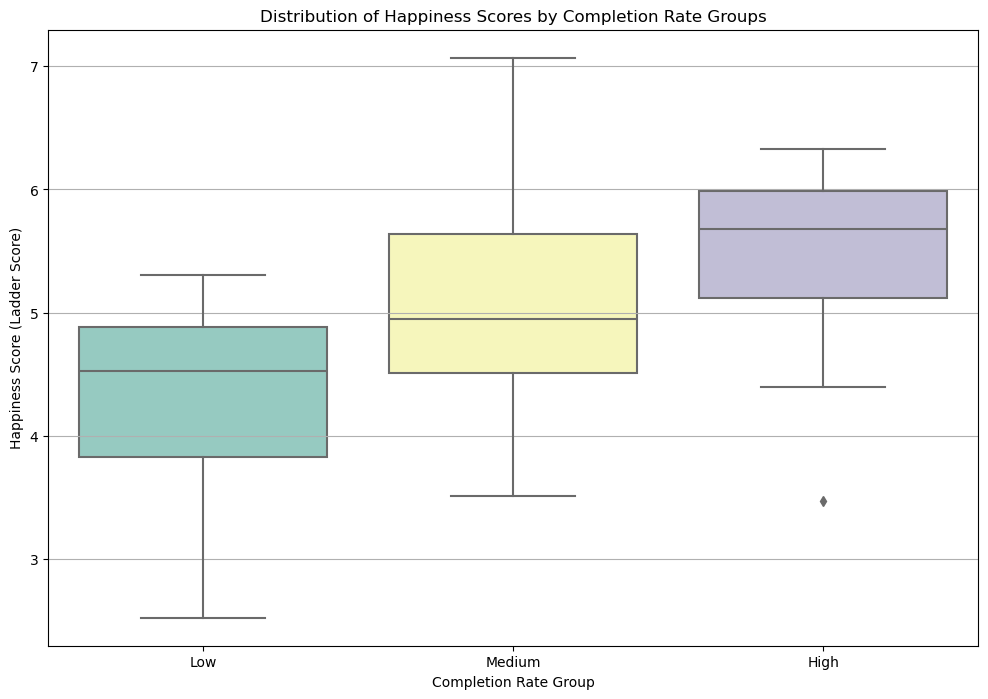

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the happiness scores by completion rate group
plt.figure(figsize=(12, 8))
sns.boxplot(x='Group', y='Ladder score', data=filtered_data, palette='Set3')
plt.title('Distribution of Happiness Scores by Completion Rate Groups')
plt.xlabel('Completion Rate Group')
plt.ylabel('Happiness Score (Ladder Score)')
plt.grid(axis='y')
plt.show()


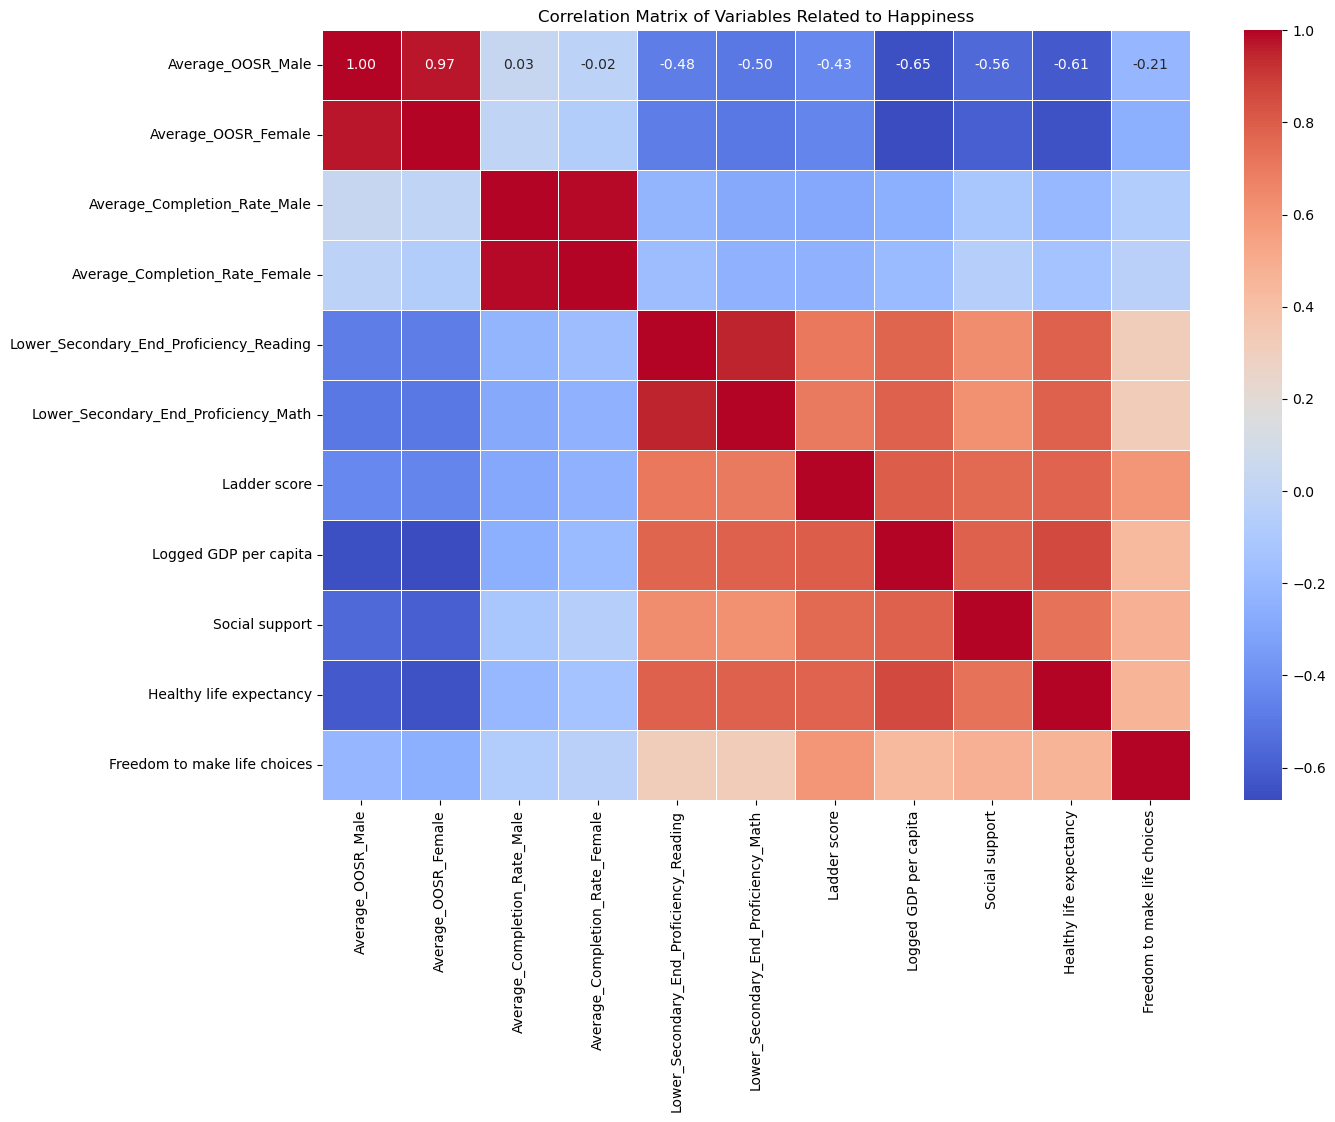

In [148]:

# Calculate the correlation matrix
correlation_matrix = df[['Average_OOSR_Male', 'Average_OOSR_Female', 'Average_Completion_Rate_Male', 
                           'Average_Completion_Rate_Female', 'Lower_Secondary_End_Proficiency_Reading', 
                           'Lower_Secondary_End_Proficiency_Math', 'Ladder score', 'Logged GDP per capita', 
                           'Social support', 'Healthy life expectancy', 'Freedom to make life choices']].corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Variables Related to Happiness')
plt.show()


In [149]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare the data by removing countries with zero scores
filtered_data = df[(df['Average_Completion_Rate'] != 0) & (df['Ladder score'] != 0)]

# Create the choropleth maps
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"type": "choropleth"}]],
    subplot_titles=("World Map of Happiness Scores in Relation to Average Completion Rate",)
)

# Happiness score map
happiness_map = px.choropleth(
    filtered_data,
    locations="Country",
    locationmode="country names",
    color="Ladder score",
    hover_name="Country",
    hover_data=["Average_Completion_Rate", "Ladder score"],
    color_continuous_scale=px.colors.sequential.YlGnBu,
    labels={'Ladder score': 'Happiness Score'}
)

# Education score map
education_map = px.choropleth(
    filtered_data,
    locations="Country",
    locationmode="country names",
    color="Average_Completion_Rate",
    hover_name="Country",
    hover_data=["Average_Completion_Rate", "Ladder score"],
    color_continuous_scale=px.colors.sequential.Plasma,
    labels={'Average_Completion_Rate': 'Average Completion Rate'}
)

# Add the choropleth maps to the figure
for trace in happiness_map.data:
    fig.add_trace(trace)
    
for trace in education_map.data:
    fig.add_trace(trace)

# Update the layout with buttons
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label="Happiness Score",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "World Map of Happiness Scores in Relation to Average Completion Rate"}]),
                dict(label="Average Completion Rate",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "World Map of Average Completion Rates"}])
            ],
            direction="down",
            showactive=True
        )
    ]
)

# Update the layout for better visualization
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgrey")
fig.update_layout(coloraxis_colorbar=dict(title="Score"))

fig.show()
